# SpaceX Falcon 9 first stage Landing Prediction

## 1. Project Overview

In this project I will try to predict if the booster part of SpaceX rocket Falcon 9, will return back and land succesfully or not.

To achieve this, I will collect SpaceX's launches data with two different ways:

- SpaceX API (data until 2022)(Library: requests, pandas)
- Web Scraping from Wikipedia (data from 2023 untill now)(Library: pandas)

Then, I will prepare the data for the cleaning part. (Library: pandas for both parts)

After, as the data is ready and in handy form, my goal is to understand the data and extract information. For this reason, I will make different visualizations, using matplotlib and seaborn libraries.

Finally, for the modeling part, I will use four different models which are Logistic Regression, Decision Trees, Random Forest and Support Vector Machine (SVM) and I will compare them. (Libraries: scikit-learn)

## 2. Data Collection

### 2.1 SpaceX API (up to 2022)

In [1]:
# Required libraries
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
# Data Collection from API
spacex_url="https://api.spacexdata.com/v4/launches/"
response = requests.get(spacex_url)
data = response.json()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

data = pd.DataFrame(data)

In [3]:
data.head()

,fairings,links,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id
0,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png', 'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88', 'youtube_id': '0a_00nJ_Y88', 'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a
1,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/f9/4a/ZboXReNb_o.png', 'large': 'https://images2.imgbox.com/80/a2/bkWotCIS_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=Lk4zQ2wP-Nc', 'youtube_id': 'Lk4zQ2wP-Nc', 'article': 'https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b
2,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/6c/cb/na1tzhHs_o.png', 'large': 'https://images2.imgbox.com/4a/80/k1oAkY0k_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=v0w9p3U8860', 'youtube_id': 'v0w9p3U8860', 'article': 'http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary', 'wikipedia': 'https://en.wikipedia.org/wiki/Trailblazer_(satellite)'}",None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c
3,"{'reused': False, 'recovery_a

In [4]:
data.shape

(205, 27)

In [5]:
data.columns

Index(['fairings', 'links', 'static_fire_date_utc', 'static_fire_date_unix',
       'net', 'window', 'rocket', 'success', 'failures', 'details', 'crew',
       'ships', 'capsules', 'payloads', 'launchpad', 'flight_number', 'name',
       'date_utc', 'date_unix', 'date_local', 'date_precision', 'upcoming',
       'cores', 'auto_update', 'tbd', 'launch_library_id', 'id'],
      dtype='object')

In [6]:
# Important functions to extract features from the data
def get_BoosterVersion(data):
    for x in data['rocket']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
            BoosterVersion.append(response['name'])

def get_LaunchSite(data):
    for x in data['launchpad']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])

def get_Payloads(data):
    for x in data['payloads']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+x).json()
            Payload_Kg.append(response['mass_kg'])
            Orbit.append(response['orbit'])

def get_Core(data):
    for x in data['cores']:
        if x['core']!= None:
            response = requests.get("https://api.spacexdata.com/v4/cores/"+x['core']).json()
            Block.append(response['block'])
            Serial.append(response['serial'])
            
        else:
            Block.append(None)
            Serial.append(None)
        Gridfins.append(x['gridfins'])
        Legs.append(x['legs'])
        Reused.append(x['reused'])
        LandingAttempt.append(x['landing_attempt'])
        LandingType.append(x['landing_type'])
        SuccessLanding.append(str(x['landing_success']))
        Landpad.append(x['landpad'])

# Features's lists that are going to be the columns of our dataframe
BoosterVersion = []
Block = []
Longitude =[]
Latitude = []
LaunchSite = []
Payload_Kg = []
Orbit = []
Serial = []
SuccessLanding = []
Landpad = []
Gridfins = []
Legs = []
Reused = []
LandingAttempt = []
LandingType = []

In [7]:
# We keep the rockets that have single boosters
df = data[data['cores'].map(len)==1].copy()
df = data[data['payloads'].map(len)==1].copy()

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
df['cores'] = df['cores'].map(lambda x: x[0])
df['payloads'] = df['payloads'].map(lambda x: x[0])

df['Date'] = pd.to_datetime(df['date_utc']).dt.date
df.head()

,fairings,links,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,Date
0,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png', 'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88', 'youtube_id': '0a_00nJ_Y88', 'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",True,False,None,5eb87cd9ffd86e000604b32a,2006-03-24
1,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/f9/4a/ZboXReNb_o.png', 'large': 'https://images2.imgbox.com/80/a2/bkWotCIS_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=Lk4zQ2wP-Nc', 'youtube_id': 'Lk4zQ2wP-Nc', 'article': 'https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",True,False,None,5eb87cdaffd86e000604b32b,2007-03-21
3,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/95/39/sRqN7rsv_o.png', 'large': 'https://images2.imgbox.com/a3/99/qswRYzE8_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=dLQ2tZEH6G0', 'youtube_id': 'dLQ2tZEH6G0', 'article': 'https://en.wikipedia.org/wiki/Ratsat', 'wikipedia': 'https://en.wikipedia.org/wiki/Ratsat'}",2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",True,False,None,5eb87cdbffd86e000604b32d,2008-09-28
4,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{

In [8]:
# Implement of the functions to the dataframe df
get_BoosterVersion(df)
get_Core(df)
get_LaunchSite(df)
get_Payloads(df)

In [9]:
# A dictionory that corresponds the values of its feature with a proper name
data_dict = {
    "Date" : list(df['Date']),
    "Booster Version" : BoosterVersion,
    "Block" : Block,
    "Serial" : Serial,
    "Gridfins": Gridfins,
    "Legs": Legs,
    "Reused": Reused,
    "Longitude" : Longitude,
    "Latitude" : Latitude,
    "Launch Site" : LaunchSite,
    "Payload (Kg)" : Payload_Kg,
    "Orbit" : Orbit,
    "Landpad" : Landpad,
    "Landing Type": LandingType,
    "Landing Attempt": LandingAttempt,
    "Landing Success": SuccessLanding
}

In [10]:
# Convert the dictionary to a dataframe
spacex_api_22 = pd.DataFrame(data_dict)

In [11]:
spacex_api_22.head()

,Date,Booster Version,Block,Serial,Gridfins,Legs,Reused,Longitude,Latitude,Launch Site,Payload (Kg),Orbit,Landpad,Landing Type,Landing Attempt,Landing Success
0,2006-03-24,Falcon 1,NaN,Merlin1A,False,False,False,167.743129,9.047721,Kwajalein Atoll,20.0,LEO,None,None,False,None
1,2007-03-21,Falcon 1,NaN,Merlin2A,False,False,False,167.743129,9.047721,Kwajalein Atoll,NaN,LEO,None,None,False,None
2,2008-09-28,Falcon 1,NaN,Merlin2C,False,False,False,167.743129,9.047721,Kwajalein Atoll,165.0,LEO,None,None,False,None
3,2009-07-13,Falcon 1,NaN,Merlin3C,False,False,False,167.743129,9.047721,Kwajalein Atoll,200.0,LEO,None,None,False,None
4,2010-06-04,Falcon 9,1.0,B0003,False,False,False,-80.577366,28.561857,CCSFS SLC 40,NaN,LEO,None,None,False,None


In [12]:
spacex_api_22.tail()

,Date,Booster Version,Block,Serial,Gridfins,Legs,Reused,Longitude,Latitude,Launch Site,Payload (Kg),Orbit,Landpad,Landing Type,Landing Attempt,Landing Success
175,2022-10-20,Falcon 9,NaN,None,None,None,None,-80.577366,28.561857,CCSFS SLC 40,13260.0,VLEO,None,None,None,None
176,2022-11-01,Falcon 9,NaN,None,None,None,None,-80.577366,28.561857,CCSFS SLC 40,5100.0,MEO,None,None,None,None
177,2022-12-01,Falcon 9,NaN,None,None,None,None,-120.610829,34.632093,VAFB SLC 4E,NaN,PO,None,None,None,None
178,2022-12-01,Falcon 9,NaN,None,None,None,None,-80.577366,28.561857,CCSFS SLC 40,NaN,SSO,None,None,None,None
179,2022-12-01,Falcon 9,NaN,None,None,None,None,-80.577366,28.561857,CCSFS SLC 40,5100.0,MEO,None,None,None,None


### 2.2 Data Collection From Wikipedia

SpaceX's API is giving us some useful data, however the data is not updated. So, we will use a second way to collect data from 2022 until 2025. We are going to collect it from Wikipedia.

In [13]:
# Extract wikipedia's data and load to a dataframe
wiki_url = "https://en.wikipedia.org/wiki/List_of_Falcon_9_and_Falcon_Heavy_launches#Past_launches"
tables = pd.read_html(wiki_url)
t2023 = tables[0]
t2023.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,195,"Dedicated SmallSat Rideshare mission to Sun-synchronous orbit.[18] It included six space tugs, also known as orbital transfer vehicles (OTV), which are two of D-Orbit's ION Satellite Carriers, Epic Aerospace's Chimera LEO 1, Momentus's Vigoride-5, Skykraft's OTV and Launcher's Orbiter SN1.[19][20] Orbiter SN1 failed shortly after deployment from Falcon and before deploying payloads. One of the payloads, EWS RROCI failed to deploy from Falcon 9 and the satellite re-entered with the upper stage.[21] This was not a SpaceX failure as brokered dispensers and deployers are used on Transporter missions.[22]","Dedicated SmallSat Rideshare mission to Sun-synchronous orbit.[18] It included six space tugs, also known as orbital transfer vehicles (OTV), which are two of D-Orbit's ION Satellite Carriers, Epic Aerospace's Chimera LEO 1, Momentus's Vigoride-5, Skykraft's OTV and Launcher's Orbiter SN1.[19][20] Orbiter SN1 failed shortly after deployment from Falcon and before deploying payloads. One of the payloads, EWS RROCI failed to deploy from Falcon 9 and the satellite re-entered with the upper stage.[21] This was not a SpaceX failure as brokered dispensers and deployers are used on Transporter missions.[22]","Dedicated SmallSat Rideshare mission to Sun-synchronous orbit.[18] It included six space tugs, also known as orbital transfer vehicles (OTV), which are two of D-Orbit's ION Satellite Carriers, Epic Aerospace's Chimera LEO 1, Momentus's Vigoride-5, Skykraft's OTV and Launcher's Orbiter SN1.[19][20] Orbiter SN1 failed shortly after deployment from Falcon and before deploying payloads. One of the payloads, EWS RROCI failed to deploy from Falcon 9 and the satellite re-entered with the upper stage.[21] This was not a SpaceX failure as brokered dispensers and deployers are used on Transporter missions.[22]","Dedicated SmallSat Rideshare mission to Sun-synchronous orbit.[18] It included six space tugs, also known as orbital transfer vehicles (OTV), which are two of D-Orbit's ION Satellite Carriers, Epic Aerospace's Chimera LEO 1, Momentus's Vigoride-5, Skykraft's OTV and Launcher's Orbiter SN1.[19][20] Orbiter SN1 failed shortly after deployment from Falcon and before deploying payloads. One of the payloads, EWS RROCI failed to deploy from Falcon 9 and the satellite re-entered with the upper stage.[21] This was not a SpaceX failure as brokered dispensers and deployers are used on Transporter missions.[22]","Dedicated SmallSat Rideshare mission to Sun-synchronous orbit.[18] It included six space tugs, also known as orbital transfer vehicles (OTV), which are two of D-Orbit's ION Satellite Carriers, Epic Aerospace's Chimera LEO 1, Momentus's Vigoride-5, Skykraft's OTV and Launcher's Orbiter SN1.[19][20] Orbiter SN1 failed shortly after deployment from Falcon and before deploying payloads. One of the payloads, EWS RROCI failed to deploy from Falcon 9 and the satellite re-entered with the upper stage.[21] This was not a SpaceX failure as brokered dispensers and deployers are used on Transporter missions.[22]","Dedicated SmallSat Rideshare mission to Sun-synchronous orbit.[18] It included six space tugs, also known as orbital transfer vehicles (OTV), which are two of D-Orbit's ION Satellite Carriers, Epic Aerospace's Chimera LEO 1, Momentus's Vigoride-5, Skykraft's OTV and Launcher's Orbiter SN1.[19][20] Orbiter SN1 failed shortly after deployment from Falcon and before deploying payloads. One of the payloads, EWS RROCI failed to deploy from Falcon 9 and the satellite re-entered with the upper stage.[21] This was not a SpaceX failure as brokered dispensers and deployers are used on Transporter missions.[22]","Dedicated SmallSat Rideshare m

In [14]:
t2023.columns

Index(['Flight No.', 'Date and time (UTC)', 'Version, booster[f]',
       'Launch site', 'Payload[g]', 'Payload mass', 'Orbit', 'Customer',
       'Launch outcome', 'Booster landing'],
      dtype='object')

In [15]:
# We keep the rows that start with Month's name
mask = t2023['Date and time (UTC)'].astype(str).str.match(r'^[A-Za-z]+\s+\d{1,2}')

t2023 = t2023[mask].copy()
t2023.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
2,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
4,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt
5,FH 5,"January 15, 2023 22:56[29]",B1064.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑2)
6,FH 5,"January 15, 2023 22:56[29]",B1065.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑1)


In [16]:
# Function to get the tables with the annual data
tables23_24_25 = []

def get_tables(df):
    for table in df[0:3]:

        # We keep the rows that start with Month's name
        date_col = table.columns[1]
        mask = table[date_col].astype(str).str.match(r'^[A-Za-z]+\s+\d{1,2}')
        
        table = table[mask].copy()
        tables23_24_25.append(table)

In [17]:
# Implement of the function
get_tables(tables)

In [18]:
tables23_24_25[1].head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,286,"January 3, 2024 03:44[228]",F9 B5 B1082.1,"Vandenberg, SLC‑4E",Starlink: Group 7-9 (22 satellites),"~16,800 kg (37,000 lb)",LEO,SpaceX,Success,Success (OCISLY)
2,287,"January 3, 2024 23:04[229]",F9 B5 B1076.10,"Cape Canaveral, SLC‑40",Ovzon-3,"1,800 kg (4,000 lb)",GTO,Ovzon,Success,Success (LZ‑1)
4,288,"January 7, 2024 22:35[233]",F9 B5 B1067.16,"Cape Canaveral, SLC‑40",Starlink: Group 6-35 (23 satellites),"~17,100 kg (37,700 lb)",LEO,SpaceX,Success,Success (ASOG)
6,289,"January 14, 2024 08:59[235]",F9 B5 B1061.18,"Vandenberg, SLC‑4E",Starlink: Group 7-10 (22 satellites),"~16,700 kg (36,800 lb)",LEO,SpaceX,Success,Success (OCISLY)
8,290,"January 15, 2024 01:52[236]",F9 B5 B1073.12,"Cape Canaveral, SLC‑40",Starlink: Group 6-37 (23 satellites),"~17,100 kg (37,700 lb)",LEO,SpaceX,Success,Success (ASOG)


In [19]:
# Merge the tables for the years 2023, 2024, 2025
spacex_wiki_23_25 = pd.concat(tables23_24_25, ignore_index=True)
spacex_wiki_23_25

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
2,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt
3,FH 5,"January 15, 2023 22:56[29]",B1064.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑2)
4,FH 5,"January 15, 2023 22:56[29]",B1065.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑1)
...,...,...,...,...,...,...,...,...,...,...
288,460,"April 14, 2025 04:00[522]",F9 B5 B1067.27,"Cape Canaveral, SLC‑40",Starlink: Group 6-73,"~15,500 kg (34,200 lb)",LEO,SpaceX,Success,Success (JRTI)
289,461,"April 20, 2025 12:29[523]",F9 B5 B1082.12,"Vandenberg, SLC‑4E",NROL-145 (22 Starshield satellites),Unknown,LEO,NRO,Success,Success (OCISLY)
290,462,"April 21, 2025 08:15[524]",F9 B5 B1092.3,"Kennedy, LC‑39A",SpaceX CRS-32 (Cargo Dragon C209.5),"3,021 kg (6,660 lb)",LEO (ISS),NASA (CRS),Success,Success (LZ‑1)
291,463,"April 22, 2025 00:48[526]",F9 B5 B1090.3,"Cape Canaveral, SLC‑40","Bandwagon-3 (425Sat-3,[527] Tomorrow-S7, PHEONIX)",Unknown[h],LEO,Republic of Korea Armed Forces Tomorrow.io Atmos Space Cargo,Success,Success (LZ‑2)


## 3. Data Preprocessing

### 3.1 Data untill 2022

In [20]:
# We keep only launches that attempted to land
spacex_api_22 = spacex_api_22[(spacex_api_22['Landing Attempt'] == True) & (spacex_api_22['Landing Type'] != 'Ocean')]

In [21]:
# We keep only Falcon9 launches as SpaceX ended the Falcon 1 program
spacex_api_22 = spacex_api_22[spacex_api_22['Booster Version'] == 'Falcon 9']
spacex_api_22.head()

,Date,Booster Version,Block,Serial,Gridfins,Legs,Reused,Longitude,Latitude,Launch Site,Payload (Kg),Orbit,Landpad,Landing Type,Landing Attempt,Landing Success
15,2015-01-10,Falcon 9,1.0,B1012,True,True,False,-80.577366,28.561857,CCSFS SLC 40,2395.0,ISS,5e9e3032383ecb761634e7cb,ASDS,True,False
17,2015-04-14,Falcon 9,1.0,B1015,True,True,False,-80.577366,28.561857,CCSFS SLC 40,1898.0,ISS,5e9e3032383ecb761634e7cb,ASDS,True,False
19,2015-06-28,Falcon 9,1.0,B1018,True,True,False,-80.577366,28.561857,CCSFS SLC 40,2477.0,ISS,5e9e3032383ecb6bb234e7ca,ASDS,True,None
20,2015-12-22,Falcon 9,1.0,B1019,True,True,False,-80.577366,28.561857,CCSFS SLC 40,2034.0,LEO,5e9e3032383ecb267a34e7c7,RTLS,True,True
21,2016-01-17,Falcon 9,1.0,B1017,True,True,False,-120.610829,34.632093,VAFB SLC 4E,553.0,PO,5e9e3033383ecbb9e534e7cc,ASDS,True,False


In [22]:
spacex_api_22.columns

Index(['Date', 'Booster Version', 'Block', 'Serial', 'Gridfins', 'Legs',
       'Reused', 'Longitude', 'Latitude', 'Launch Site', 'Payload (Kg)',
       'Orbit', 'Landpad', 'Landing Type', 'Landing Attempt',
       'Landing Success'],
      dtype='object')

In [23]:
# We keep the Features that are important in the prediction
spacex22 = spacex_api_22[[
    'Date',
    'Block', 
    'Serial', 
    'Gridfins', 
    'Legs',
    'Reused',
    'Launch Site', 
    'Payload (Kg)',
    'Orbit',
    'Landing Type', 
    'Landing Success'
]]

In [24]:
spacex22.reset_index(drop=True, inplace=True)
spacex22.head()

,Date,Block,Serial,Gridfins,Legs,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
0,2015-01-10,1.0,B1012,True,True,False,CCSFS SLC 40,2395.0,ISS,ASDS,False
1,2015-04-14,1.0,B1015,True,True,False,CCSFS SLC 40,1898.0,ISS,ASDS,False
2,2015-06-28,1.0,B1018,True,True,False,CCSFS SLC 40,2477.0,ISS,ASDS,None
3,2015-12-22,1.0,B1019,True,True,False,CCSFS SLC 40,2034.0,LEO,RTLS,True
4,2016-01-17,1.0,B1017,True,True,False,VAFB SLC 4E,553.0,PO,ASDS,False


In [25]:
spacex22['Gridfins'].unique()

array([True], dtype=object)

In [26]:
spacex22['Legs'].unique()

array([True], dtype=object)

In [27]:
# As every booster has these two features in common, there's no reason to keep them
spacex22 = spacex22.drop(['Gridfins', 'Legs'], axis=1)

In [28]:
spacex22.shape

(142, 9)

In [29]:
spacex22['Date'] = pd.to_datetime(spacex22['Date'])

In [30]:
spacex22.dtypes

Date               datetime64[ns]
Block                     float64
Serial                     object
Reused                     object
Launch Site                object
Payload (Kg)              float64
Orbit                      object
Landing Type               object
Landing Success            object
dtype: object

### 3.2 Data 2023-2025

In [31]:
spacex_wiki_23_25.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
2,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt
3,FH 5,"January 15, 2023 22:56[29]",B1064.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑2)
4,FH 5,"January 15, 2023 22:56[29]",B1065.2 (side),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,Success (LZ‑1)


In [32]:
# We keep launches with only one core
spacex_wiki_23_25['Flight No.'] = spacex_wiki_23_25['Flight No.'].astype(str)
spacex_wiki_23_25 = spacex_wiki_23_25[~spacex_wiki_23_25['Flight No.'].str.startswith('FH')]
spacex_wiki_23_25.head()

,Flight No.,Date and time (UTC),"Version, booster[f]",Launch site,Payload[g],Payload mass,Orbit,Customer,Launch outcome,Booster landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060.15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[h],SSO,Various,Success,Success (LZ‑1)
1,196,"January 10, 2023 04:50[23]",F9 B5 B1076.2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
5,197,"January 18, 2023 12:24[33]",F9 B5 B1077.2,"Cape Canaveral, SLC‑40",USA-343 (GPS-III SV06),"4,352 kg (9,595 lb)",MEO,USSF,Success,Success (JRTI)
6,198,"January 19, 2023 15:43[39]",F9 B5 B1075.1,"Vandenberg, SLC‑4E",Starlink: Group 2-4 (51 satellites),"15,000 kg (33,000 lb)",LEO,SpaceX,Success,Success (OCISLY)
7,199,"January 26, 2023 09:32[40]",F9 B5 B1067.9,"Cape Canaveral, SLC‑40",Starlink: Group 5-2 (56 satellites),"~17,400 kg (38,400 lb)",LEO,SpaceX,Success,Success (JRTI)


In [33]:
spacex_wiki_23_25.columns

Index(['Flight No.', 'Date and time (UTC)', 'Version, booster[f]',
       'Launch site', 'Payload[g]', 'Payload mass', 'Orbit', 'Customer',
       'Launch outcome', 'Booster landing'],
      dtype='object')

In [34]:
# We keep the Features that are important in the prediction
spacex23_25 = spacex_wiki_23_25[[
    'Date and time (UTC)', 
    'Version, booster[f]',
    'Launch site', 
    'Payload mass', 
    'Orbit', 
    'Booster landing'
]]

We will transform the name of every launch site to match those of spacex22

In [35]:
spacex23_25['Launch site'].unique()

array(['Cape Canaveral, SLC‑40', 'Vandenberg, SLC‑4E', 'Kennedy, LC‑39A',
       'Vandenberg, SLC-4E',
       'Carried 2,762\xa0kg (6,089\xa0lb) of cargo and supplies to the International Space Station (ISS).[407] CRS-31 is the first Dragon scheduled to perform a test "reboost" of the ISS on November 8, 2024, burning its aft-facing Draco thrusters for 12.5 minutes to counteract atmospheric drag on the station.[408]',
       'Kennedy, LC‑39A[493]'], dtype=object)

In [36]:
# Filter the DataFrame to keep only valid launch site names (exclude non-site text entries)
spacex23_25 = spacex23_25[spacex23_25['Launch site'].isin([
    'Cape Canaveral, SLC‑40',
    'Vandenberg, SLC‑4E',
    'Kennedy, LC‑39A',
    'Kennedy, LC‑39A[494]'
])]

In [37]:
spacex22['Launch Site'].unique()

array(['CCSFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

In [38]:
spacex23_25.loc[spacex23_25['Launch site'].str.startswith('Cape'), 'Launch site'] = 'CCSFS SLC 40'
spacex23_25.loc[spacex23_25['Launch site'].str.startswith('Vandenberg'), 'Launch site'] = 'VAFB SLC 4E'
spacex23_25.loc[spacex23_25['Launch site'].str.startswith('Kennedy'), 'Launch site'] = 'KSC LC 39A'

In [39]:
spacex23_25.head()

,Date and time (UTC),"Version, booster[f]",Launch site,Payload mass,Orbit,Booster landing
0,"January 3, 2023 14:56[17]",F9 B5 B1060.15,CCSFS SLC 40,Unknown[h],SSO,Success (LZ‑1)
1,"January 10, 2023 04:50[23]",F9 B5 B1076.2,CCSFS SLC 40,"6,000 kg (13,000 lb)",Polar LEO,Success (LZ‑1)
5,"January 18, 2023 12:24[33]",F9 B5 B1077.2,CCSFS SLC 40,"4,352 kg (9,595 lb)",MEO,Success (JRTI)
6,"January 19, 2023 15:43[39]",F9 B5 B1075.1,VAFB SLC 4E,"15,000 kg (33,000 lb)",LEO,Success (OCISLY)
7,"January 26, 2023 09:32[40]",F9 B5 B1067.9,CCSFS SLC 40,"~17,400 kg (38,400 lb)",LEO,Success (JRTI)


We transform 'Date' to be in datetime type

In [40]:
spacex23_25.rename(columns={'Date and time (UTC)': 'Date'}, inplace=True)
spacex23_25[['Date']].head()

,Date
0,"January 3, 2023 14:56[17]"
1,"January 10, 2023 04:50[23]"
5,"January 18, 2023 12:24[33]"
6,"January 19, 2023 15:43[39]"
7,"January 26, 2023 09:32[40]"


In [41]:
# We keep only the date part, we exclude the time
dates_only = spacex23_25['Date'].str.extract(r'(\w+\s+\d{1,2},\s+\d{4})')[0]
spacex23_25['Date'] = pd.to_datetime(dates_only)
spacex23_25[['Date']].head()

,Date
0,2023-01-03
1,2023-01-10
5,2023-01-18
6,2023-01-19
7,2023-01-26


It will be useful to transform 'Payload' in float type

In [42]:
digits = spacex23_25['Payload mass'].str.extract(r'~?([\d,]+)')[0]
only_digits = digits.str.replace(',', '', regex=False).astype('float')
only_digits

0          NaN
1       6000.0
5       4352.0
6      15000.0
7      17400.0
        ...   
288    15500.0
289        NaN
290     3021.0
291        NaN
292    16100.0
Name: 0, Length: 250, dtype: float64

In [43]:
spacex23_25.rename(columns={'Payload mass':'Payload (Kg)'}, inplace=True)

In [44]:
spacex23_25['Payload (Kg)'] = only_digits

In [45]:
spacex23_25.head()

,Date,"Version, booster[f]",Launch site,Payload (Kg),Orbit,Booster landing
0,2023-01-03,F9 B5 B1060.15,CCSFS SLC 40,NaN,SSO,Success (LZ‑1)
1,2023-01-10,F9 B5 B1076.2,CCSFS SLC 40,6000.0,Polar LEO,Success (LZ‑1)
5,2023-01-18,F9 B5 B1077.2,CCSFS SLC 40,4352.0,MEO,Success (JRTI)
6,2023-01-19,F9 B5 B1075.1,VAFB SLC 4E,15000.0,LEO,Success (OCISLY)
7,2023-01-26,F9 B5 B1067.9,CCSFS SLC 40,17400.0,LEO,Success (JRTI)


In [46]:
# We extract Block's part
spacex23_25['Block'] = spacex23_25['Version, booster[f]'].str.extract(r'\b(B[1-5])\b')[0]
spacex23_25['Block'].unique()

array(['B5'], dtype=object)

In [47]:
# We extract Serial's part
spacex23_25['Serial'] = spacex23_25['Version, booster[f]'].str.extract(r'\b(B\d{2}[,\d\.]*)')[0]
spacex23_25['Serial'].unique()[0:10]

array(['B1060.15', 'B1076.2', 'B1077.2', 'B1075.1', 'B1067.9', 'B1071.7',
       'B1069.5', 'B1073.6', 'B1062.12', 'B1063.9'], dtype=object)

In [48]:
# We seperated the features, so we don't need the 'Version, booster[f]' column
spacex23_25.drop('Version, booster[f]', axis=1, inplace=True)

In [49]:
# We will split Booster landing column in two different features
spacex23_25['Booster landing'].unique()

array(['Success (LZ‑1)', 'Success (JRTI)', 'Success (OCISLY)',
       'Success (ASOG)', 'Success (LZ‑4)', 'Partial failure (JRTI)',
       'Success (LZ‑2)', 'No attempt', 'Failure (ASOG)', 'Failure (JRTI)'],
      dtype=object)

In [50]:
# Landing Success feature
landing_success = []

for row in spacex23_25['Booster landing'].tolist():
    if row.startswith('Success'):
        landing_success.append(True)
    elif row.startswith('No attempt'):
        landing_success.append(np.nan)
    else:
        landing_success.append(False)

spacex23_25['Landing Success'] = landing_success

In [51]:
# Landing type's values from 2022's data
spacex22['Landing Type'].unique()

array(['ASDS', 'RTLS'], dtype=object)

In [52]:
# 'ASDS' type contains 'JRTI', 'OCISLY', 'ASOG'
# 'RTLS' type contains 'LZ‑1', 'LZ‑2', 'LZ‑4'

In [53]:
# We get the Landing Type values
landing_type = []

for row in spacex23_25['Booster landing'].tolist():
    if isinstance(row, str):
        if any(x in row for x in ['JRTI', 'OCISLY', 'ASOG']):
            landing_type.append('ASDS')
        elif any(x in row for x in ['LZ‑1', 'LZ‑2', 'LZ‑4']):
            landing_type.append('RTLS')
        else:
            landing_type.append(np.nan)
    else:
        landing_type.append(np.nan)

spacex23_25['Landing Type'] = landing_type

In [54]:
# We seperated the 'Booster landing' column in two different columns, so we don't need it
spacex23_25.drop('Booster landing', axis=1, inplace=True)


The Serial's decimal part is the number of times that a booster has reused. So, if the decimal part is greater than 1, the booster has been reused:

In [55]:
def is_reused(serial):

    if isinstance(serial, str) and '.' in serial:
        try:
            decimal_part = float(serial.split('.')[1])
            return decimal_part > 1
        except ValueError:
            return False
    return False

spacex23_25['Reused'] = spacex23_25['Serial'].apply(is_reused)

In [56]:
# Serial's number is the first 4 digits
spacex23_25['Serial'] = spacex23_25['Serial'].str.extract(r'(B\d{4})')[0]

In [57]:
spacex23_25.rename(columns={'Launch site': 'Launch Site'}, inplace=True)

In [58]:
# Reorder columns to match those of spacex22 dataframe
spacex23_25 = spacex23_25[['Date', 'Block', 'Serial', 'Reused', 'Launch Site', 'Payload (Kg)', 'Orbit', 'Landing Type', 'Landing Success']]

In [59]:
# It's useful to have Block's values as numericals rather than in the form of 'B5'
spacex23_25['Block'] = spacex23_25['Block'].str.extract(r'B(\d+)')[0]

In [60]:
spacex23_25['Orbit'].unique()

array(['SSO', 'Polar LEO', 'MEO', 'LEO', 'GTO', 'LEO (ISS)',
       'Sun–Earth L2 injection', 'TLI', 'Molniya', 'Heliocentric',
       'Polar (Retrograde)'], dtype=object)

In [61]:
spacex22['Orbit'].unique()

array(['ISS', 'LEO', 'PO', 'GTO', 'SSO', 'HEO', 'VLEO', 'MEO', 'GEO',
       None, 'TLI'], dtype=object)

In [62]:
# Some Orbits are the same but present with different names in the two datasets, so we have to match them
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('LEO (ISS)'), 'Orbit'] = 'ISS'
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('LEO'), 'Orbit'] = 'LEO'
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('Polar LEO'), 'Orbit'] = 'PO'
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('Molniya'), 'Orbit'] = 'HEO'
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('Polar (Retrograde)'), 'Orbit'] = 'PO'
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('Sun–Earth L2 injection'), 'Orbit'] = 'GEO'
spacex23_25.loc[spacex23_25['Orbit'].str.startswith('Heliocentric'), 'Orbit'] = 'HEO'

### 3.3 Merging Datasets

In [63]:
print('23-25: ', spacex23_25.shape)
print('22: ', spacex22.shape)

23-25:  (250, 9)
22:  (142, 9)


In [64]:
# Finally, the dataframe will be
df_spacex = pd.concat([spacex22, spacex23_25], ignore_index=True)
df_spacex.head()

,Date,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
0,2015-01-10,1.0,B1012,False,CCSFS SLC 40,2395.0,ISS,ASDS,False
1,2015-04-14,1.0,B1015,False,CCSFS SLC 40,1898.0,ISS,ASDS,False
2,2015-06-28,1.0,B1018,False,CCSFS SLC 40,2477.0,ISS,ASDS,None
3,2015-12-22,1.0,B1019,False,CCSFS SLC 40,2034.0,LEO,RTLS,True
4,2016-01-17,1.0,B1017,False,VAFB SLC 4E,553.0,PO,ASDS,False


## 4. Data Cleaning

In [65]:
df_spacex.head(2)

,Date,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
0,2015-01-10,1.0,B1012,False,CCSFS SLC 40,2395.0,ISS,ASDS,False
1,2015-04-14,1.0,B1015,False,CCSFS SLC 40,1898.0,ISS,ASDS,False


In [66]:
df_spacex.tail(2)

,Date,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
390,2025-04-22,5,B1090,True,CCSFS SLC 40,NaN,LEO,RTLS,True
391,2025-04-25,5,B1069,True,CCSFS SLC 40,16100.0,LEO,ASDS,True


In [67]:
df_spacex.isnull().sum()

Date                0
Block               0
Serial              0
Reused              0
Launch Site         0
Payload (Kg)       40
Orbit               1
Landing Type        3
Landing Success     3
dtype: int64

In [68]:
# Payload mass is a continuous variable, so the missing values will be replaced by the mean
payload_avg = df_spacex['Payload (Kg)'].mean(axis=0)
df_spacex['Payload (Kg)'] = df_spacex['Payload (Kg)'].replace(np.nan, payload_avg)

In [69]:
# We will drop the row that includes Orbit's missing value
df_spacex.dropna(axis=0, subset=['Orbit'], ignore_index=True, inplace=True)

In [70]:
df_spacex['Landing Success'].unique()

array(['False', 'None', 'True', True, False, nan], dtype=object)

In [71]:
# Transform to boolean
df_spacex['Landing Success'] = df_spacex['Landing Success'].map({'True': True, 'False': False}).fillna(df_spacex['Landing Success'])

# We keep True/False values
df_spacex = df_spacex[df_spacex['Landing Success'].isin([True, False])]

df_spacex['Landing Success'].unique()

array([False, True], dtype=object)

In [72]:
df_spacex['Reused'].unique()

array([False, True], dtype=object)

In [73]:
# Transform booleans to 0/1 values
df_spacex[['Reused', 'Landing Success']] = df_spacex[['Reused', 'Landing Success']].astype(int)

In [74]:
df_spacex.dtypes

Date               datetime64[ns]
Block                      object
Serial                     object
Reused                      int32
Launch Site                object
Payload (Kg)              float64
Orbit                      object
Landing Type               object
Landing Success             int32
dtype: object

In [75]:
df_spacex.isnull().sum()

Date               0
Block              0
Serial             0
Reused             0
Launch Site        0
Payload (Kg)       0
Orbit              0
Landing Type       0
Landing Success    0
dtype: int64

In [76]:
df_spacex.head()

,Date,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
0,2015-01-10,1.0,B1012,0,CCSFS SLC 40,2395.0,ISS,ASDS,0
1,2015-04-14,1.0,B1015,0,CCSFS SLC 40,1898.0,ISS,ASDS,0
3,2015-12-22,1.0,B1019,0,CCSFS SLC 40,2034.0,LEO,RTLS,1
4,2016-01-17,1.0,B1017,0,VAFB SLC 4E,553.0,PO,ASDS,0
5,2016-03-04,1.0,B1020,0,CCSFS SLC 40,5271.0,GTO,ASDS,0


In [77]:
df_spacex.tail(2)

,Date,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
389,2025-04-22,5,B1090,1,CCSFS SLC 40,11894.482102,LEO,RTLS,1
390,2025-04-25,5,B1069,1,CCSFS SLC 40,16100.000000,LEO,ASDS,1


## 5. Exploratory Data Analysis

In [78]:
df_spacex.shape

(386, 9)

In [79]:
df_spacex.reset_index(drop=True, inplace=True)
df_spacex

,Date,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
0,2015-01-10,1.0,B1012,0,CCSFS SLC 40,2395.000000,ISS,ASDS,0
1,2015-04-14,1.0,B1015,0,CCSFS SLC 40,1898.000000,ISS,ASDS,0
2,2015-12-22,1.0,B1019,0,CCSFS SLC 40,2034.000000,LEO,RTLS,1
3,2016-01-17,1.0,B1017,0,VAFB SLC 4E,553.000000,PO,ASDS,0
4,2016-03-04,1.0,B1020,0,CCSFS SLC 40,5271.000000,GTO,ASDS,0
...,...,...,...,...,...,...,...,...,...
381,2025-04-14,5,B1067,1,CCSFS SLC 40,15500.000000,LEO,ASDS,1
382,2025-04-20,5,B1082,1,VAFB SLC 4E,11894.482102,LEO,ASDS,1
383,2025-04-21,5,B1092,1,KSC LC 39A,3021.000000,ISS,RTLS,1
384,2025-04-22,5,B1090,1,CCSFS SLC 40,11894.482102,LEO,RTLS,1


In [80]:
df_spacex.dtypes

Date               datetime64[ns]
Block                      object
Serial                     object
Reused                      int32
Launch Site                object
Payload (Kg)              float64
Orbit                      object
Landing Type               object
Landing Success             int32
dtype: object

In [81]:
df_spacex['Landing Success'].value_counts()

Landing Success
1    375
0     11
Name: count, dtype: int64

In [82]:
df_spacex['Block'].unique()

array([1.0, 2.0, 3.0, 4.0, 5.0, '5'], dtype=object)

In [83]:
df_spacex['Block'] = df_spacex['Block'].astype('int')

In [84]:
df_spacex['Block'].unique()

array([1, 2, 3, 4, 5])

In [85]:
df_spacex.describe()

,Date,Block,Reused,Payload (Kg),Landing Success
count,386,386.000000,386.000000,386.000000,386.000000
mean,2022-11-17 02:47:52.538860032,4.839378,0.870466,12005.071249,0.971503
min,2015-01-10 00:00:00,1.000000,0.000000,330.000000,0.000000
25%,2021-12-25 00:00:00,5.000000,1.000000,7000.000000,1.000000
50%,2023-08-19 12:00:00,5.000000,1.000000,13680.000000,1.000000
75%,2024-06-08 00:00:00,5.000000,1.000000,16500.000000,1.000000
max,2025-04-25 00:00:00,5.000000,1.000000,17500.000000,1.000000
std,NaN,0.656716,0.336225,5531.235496,0.166605


Let's see if there are outliers for Payload:

<Axes: ylabel='Payload (Kg)'>

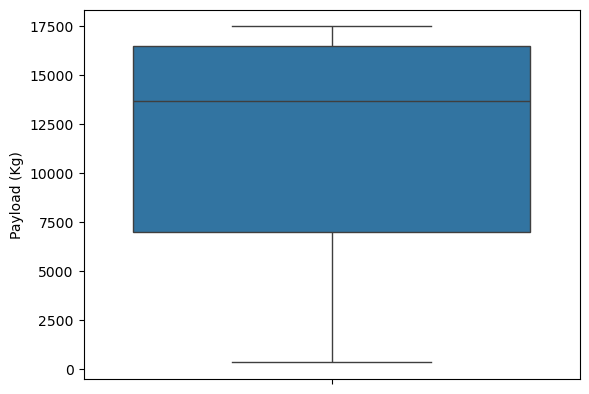

In [86]:
sns.boxplot(df_spacex, y='Payload (Kg)')

Text(0, 0.5, 'Number of Launches')

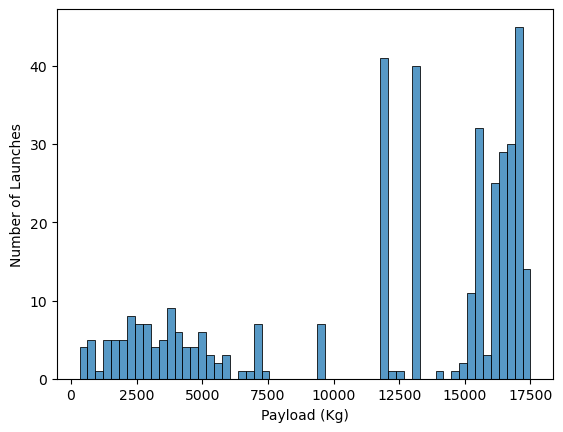

In [87]:
sns.histplot(df_spacex, x='Payload (Kg)', binwidth=300)
plt.ylabel('Number of Launches')

There are not outlier values, so we keep the feature as it is.

Let's do some visualizations to understand our data:

Text(0.5, 1.0, 'Payload Distribution')

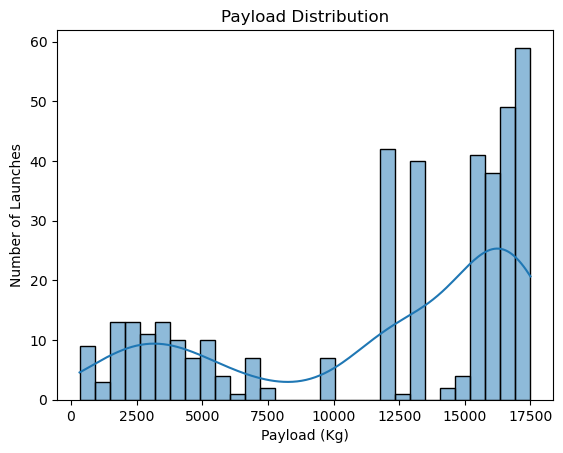

In [88]:
sns.histplot(df_spacex, x='Payload (Kg)', bins=30, kde=True)
plt.ylabel('Number of Launches')
plt.title('Payload Distribution')

Text(0.5, 1.0, 'Payload Mass vs Landing Success')

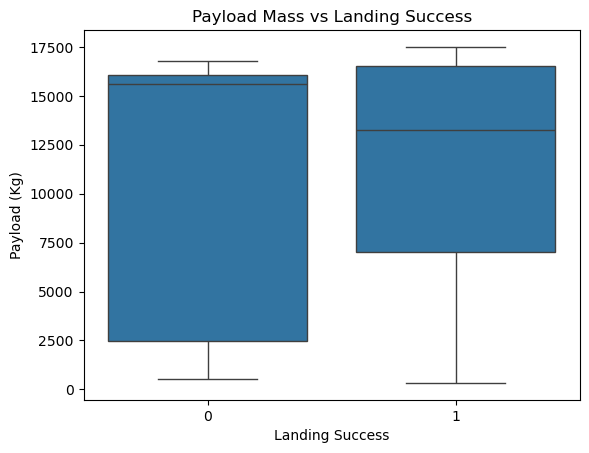

In [89]:
sns.boxplot(x='Landing Success', y='Payload (Kg)', data=df_spacex)
plt.title('Payload Mass vs Landing Success')

Text(0.5, 0, 'Payload Mass (Kg)')

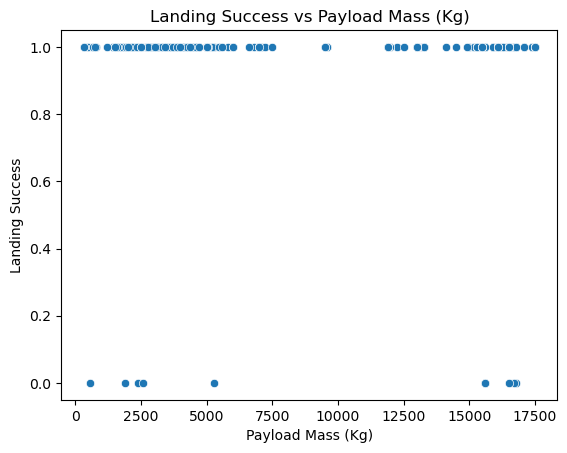

In [90]:
sns.scatterplot(x='Payload (Kg)', y='Landing Success', data=df_spacex)
plt.title('Landing Success vs Payload Mass (Kg)')
plt.xlabel('Payload Mass (Kg)')

Text(0.5, 1.0, 'Payload Mass per Orbit')

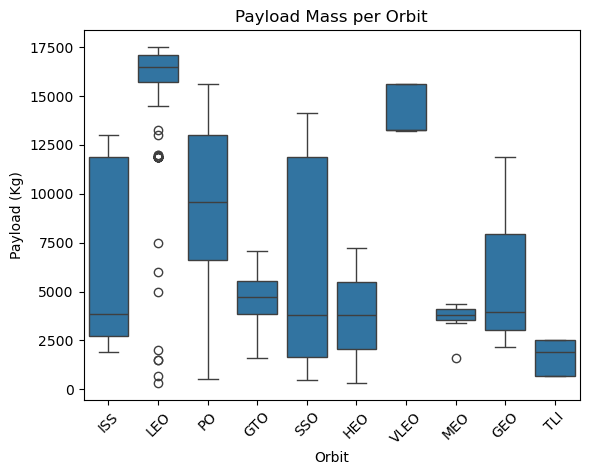

In [91]:
sns.boxplot(x='Orbit', y='Payload (Kg)', data=df_spacex)
plt.xticks(rotation=45)
plt.title('Payload Mass per Orbit')

From the above graphs we can extract some useful information:

a) At the first graph we see the distribution of the Payload Mass.
The majority of the boosters weighs more than 12,000 Kg.

b) At the second graph, we see that failure have more probabilities to happen in lighter payload masses.

c) At the third graph, we see that failures tend to occur at the extreme values of the Payload Mass,
either at very low or very high payloads.

d) At the fourth graph, we see that for some orbits have been used more tight weight ranges (either light or heavy),
while in others the weight range was wider.

Does Orbit relate with Success?

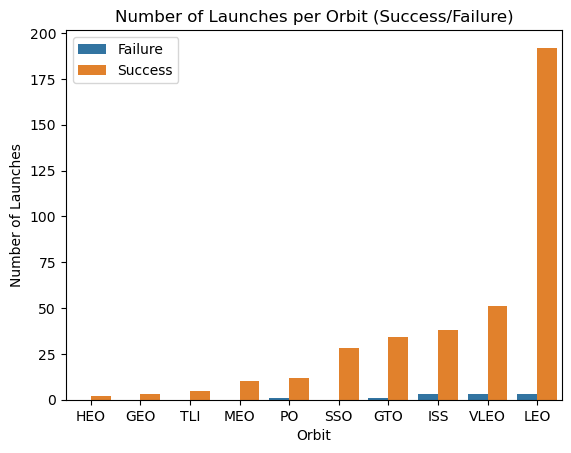

In [92]:
order = df_spacex['Orbit'].value_counts().sort_values().index
sns.countplot(df_spacex, x='Orbit', hue='Landing Success', order=order)
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Orbit (Success/Failure)')
plt.legend(['Failure', 'Success'])

C:\Users\George\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\Users\George\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


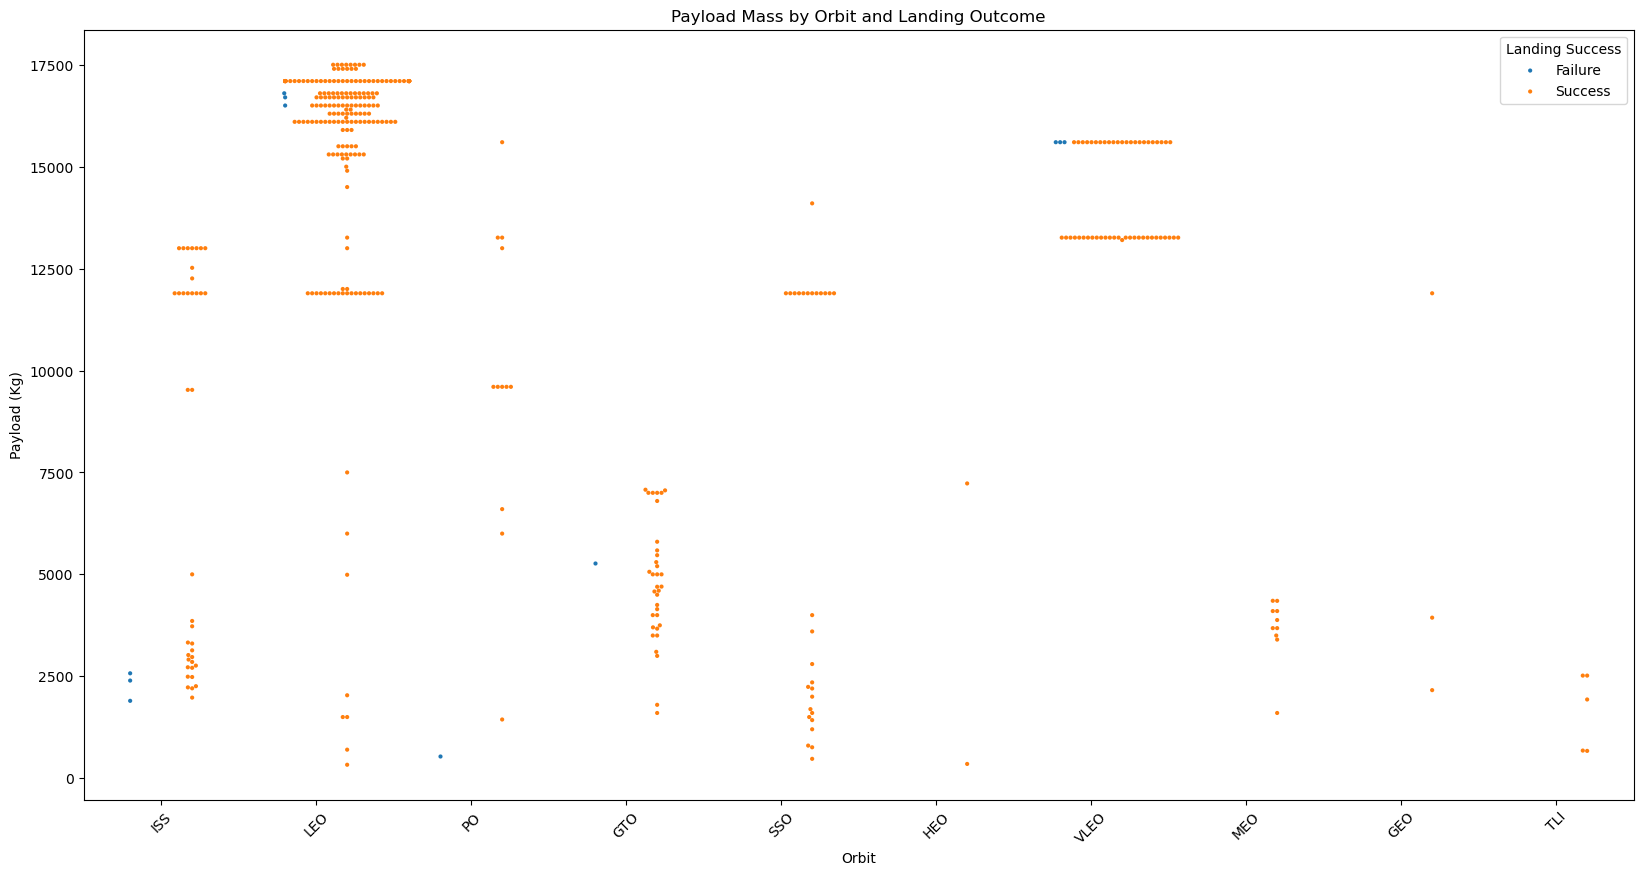

In [93]:
plt.figure(figsize=(20,10))
sns.swarmplot(
    data=df_spacex,
    x='Orbit',
    y='Payload (Kg)',
    hue='Landing Success',
    size=3,
    dodge=True
)

plt.title('Payload Mass by Orbit and Landing Outcome')
plt.xticks(rotation=45)
plt.legend(title='Landing Success', labels=['Failure', 'Success'])


As we expected, launches for orbits like LEO or VLEO carried heavier payloads, while orbits like GTO or MEO carried lighter payloads. 

In [94]:
orb_success = df_spacex.groupby('Orbit')['Landing Success'].mean().sort_values()
print('Success Rate per Orbit is: ')
print(orb_success)

Success Rate per Orbit is: 
Orbit
PO      0.923077
ISS     0.926829
VLEO    0.944444
GTO     0.971429
LEO     0.984615
GEO     1.000000
HEO     1.000000
MEO     1.000000
SSO     1.000000
TLI     1.000000
Name: Landing Success, dtype: float64


So we see that Orbit influences the outcome and this because for some orbits, SpaceX has to use more fuel (failed outcomes happen most likely when the booster is out of fuel) or some orbits are used for more difficult missions or different payloads.

Let's see if landpad is related with landing outcome:

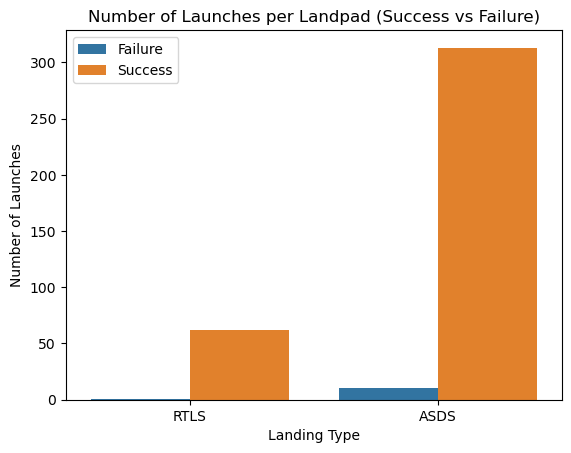

In [95]:
order = df_spacex['Landing Type'].value_counts().sort_values().index
sns.countplot(df_spacex, x='Landing Type', hue='Landing Success', order=order)
plt.xlabel('Landing Type')
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Landpad (Success vs Failure)')
plt.legend(['Failure', 'Success'])
plt.show()

In [96]:
# Success Rate for each Land Type
success_rate = df_spacex.groupby('Landing Type')['Landing Success'].mean()
print(success_rate)

Landing Type
ASDS    0.969040
RTLS    0.984127
Name: Landing Success, dtype: float64


So we see that even if the ASDS is used more often, te RTLS has slightly better success rate.

Let's see if Launch Sites have any relationship with Landing Success:

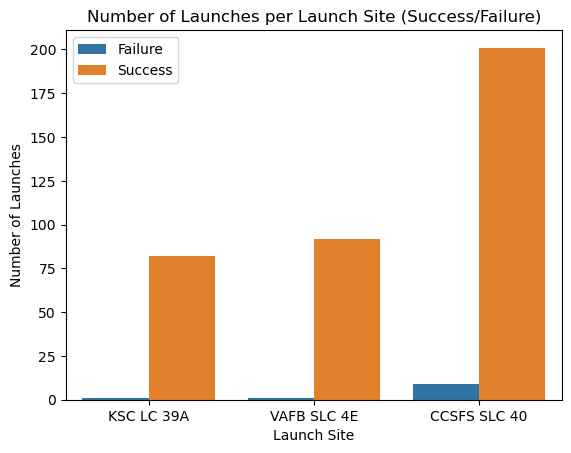

In [97]:
order = df_spacex['Launch Site'].value_counts().sort_values().index
plt.figure()
sns.countplot(df_spacex, x='Launch Site', hue='Landing Success', order=order)
plt.ylabel('Number of Launches')
plt.title('Number of Launches per Launch Site (Success/Failure)')
plt.legend(['Failure', 'Success'])

In [98]:
succ_rate = df_spacex.groupby('Launch Site')['Landing Success'].mean()
print(succ_rate)

Launch Site
CCSFS SLC 40    0.957143
KSC LC 39A      0.987952
VAFB SLC 4E     0.989247
Name: Landing Success, dtype: float64


So, as we see from the results, landing success seems to depend on the launch type. Even if CCSFS SLC 40 is the most used site, the other two have a better outcome

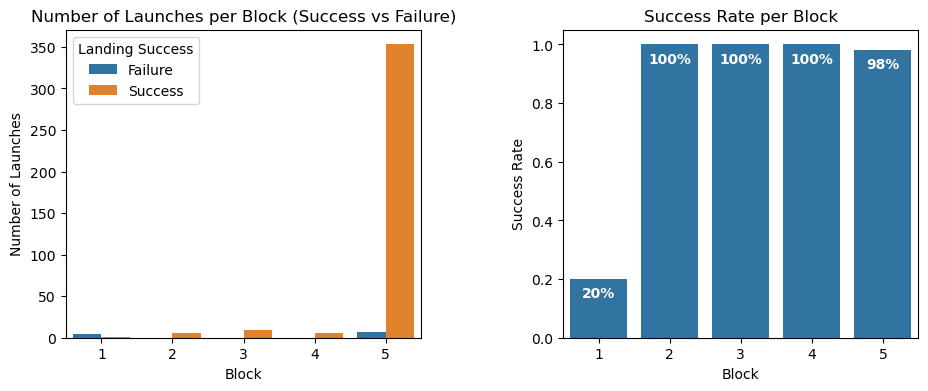

In [99]:
block_success= df_spacex.groupby('Block')['Landing Success'].mean()

fig, axes = plt.subplots(1, 2, figsize=(11,4))

# Left: Launches per Block plot
sns.countplot(df_spacex, x='Block',hue='Landing Success', ax=axes[0])
axes[0].set_ylabel('Number of Launches')
axes[0].set_title('Number of Launches per Block (Success vs Failure)')
axes[0].legend_.texts[0].set_text('Failure')
axes[0].legend_.texts[1].set_text('Success')

# Right: Success rate barplot
sns.barplot(block_success, ax=axes[1])
axes[1].set_title('Success Rate per Block')
axes[1].set_ylabel('Success Rate')
plt.subplots_adjust(wspace=0.4)

# Add percentage labels inside the bars (white text)
for i, val in enumerate(block_success.values):
    axes[1].text(i, val - 0.05, f"{val:.0%}", color='white', ha='center', va='center', fontweight='bold')

What about the relationship between Launch Sites and Landing Types:

<Axes: xlabel='Landing Type', ylabel='Launch Site'>

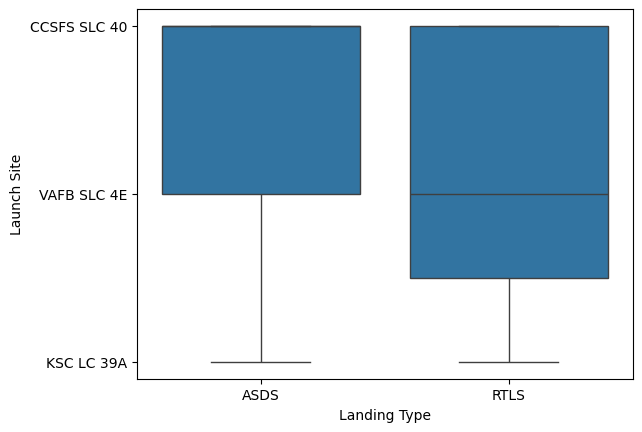

In [100]:
sns.boxplot(df_spacex, y='Launch Site', x='Landing Type')

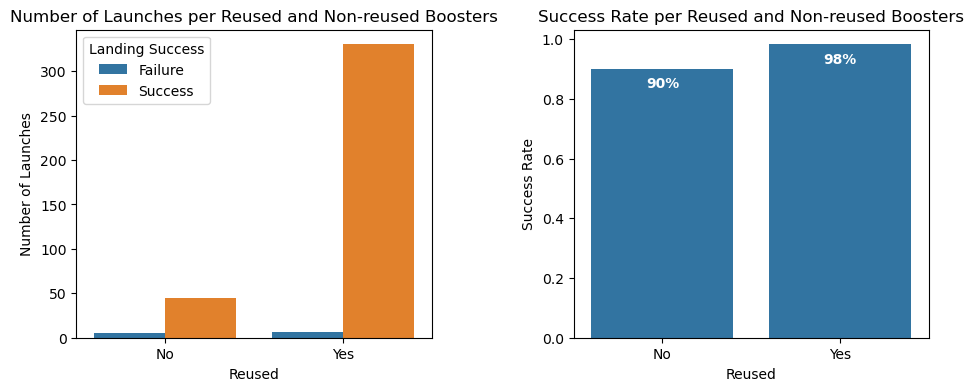

In [101]:
# We will create a column just to transform 0/1 values to No/Yes (that's to create a better graph) and we will drop it
yn = df_spacex
yn['Reused Label'] = df_spacex['Reused'].map({0: 'No', 1: 'Yes'})
reused_success = yn.groupby('Reused Label')['Landing Success'].mean()

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Left: Launch count plot
sns.countplot(data=yn, x='Reused Label', hue='Landing Success', ax=axes[0])
axes[0].set_ylabel('Number of Launches')
axes[0].set_xlabel('Reused')
axes[0].set_title('Number of Launches per Reused and Non-reused Boosters')
axes[0].legend_.texts[0].set_text('Failure')
axes[0].legend_.texts[1].set_text('Success')

# Right: Success rate barplot
sns.barplot(x=reused_success.index, y=reused_success.values, ax=axes[1])
axes[1].set_ylabel('Success Rate')
axes[1].set_xlabel('Reused')
axes[1].set_title('Success Rate per Reused and Non-reused Boosters')

# Add percentage labels inside the bars (white text)
for i, val in enumerate(reused_success.values):
    axes[1].text(i, val - 0.05, f"{val:.0%}", color='white', ha='center', va='center', fontweight='bold')

plt.subplots_adjust(wspace=0.4)
plt.show()

Maybe there is some relation between Launch Sites and Landing Types:

Text(0.5, 1.0, 'Landing Success Rate by Launch Site and Landing Type')

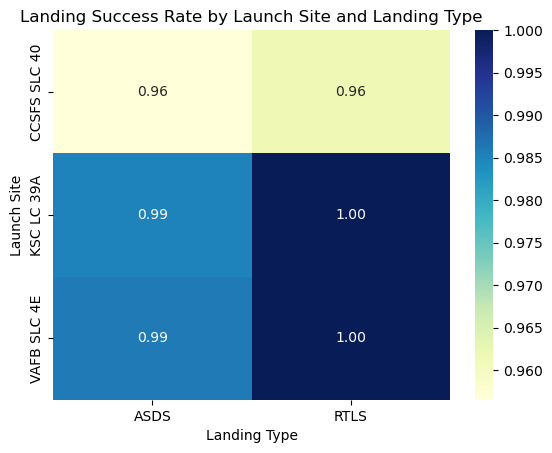

In [102]:
# Create Heatmap
pivot = df_spacex.pivot_table(
    values='Landing Success',
    index='Launch Site',
    columns='Landing Type',
    aggfunc='mean'
)

sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Landing Success Rate by Launch Site and Landing Type')


So, we see that launches from VAFB SLC 4E and KSC LC 39A, return to launch site (RTLS) with 100% success, while returns to the ocean pads (ASDS) and launches from CCSFS SLC 40 failed some times.

Finally, let's see the fluctuation of Success Rate per Year:

Text(0, 0.5, 'Success Rate')

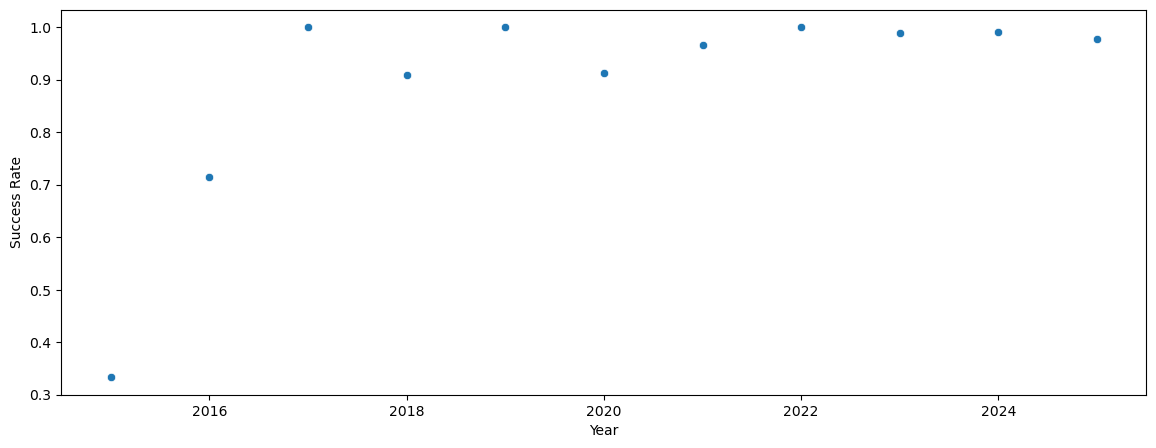

In [103]:
success_date = df_spacex[['Date', 'Landing Success']].copy()
success_date['Year'] = success_date['Date'].dt.year
success_date_rate = success_date.groupby('Year')['Landing Success'].mean()
success_df = pd.DataFrame(success_date_rate)

plt.figure(figsize=(14,5))
sns.scatterplot(success_df, x=success_df.index, y='Landing Success')
plt.ylabel('Success Rate')

After a sharp rise in 2017, successful landing rates plateau at over 90%, maintaining remarkable consistency.

In the next phase, we will use statistical modeling (logistic regression, decision trees, random forest) to evaluate whether the above correlations retain significance when controlling for multiple concurrent factors.

## 6. Modeling

In this section, we are going to develop four machine learning models to predict the landing outcome. The models that are going to be used are Logistic Regression, Decision Trees, Random Forest and Support Vector Machine (SVM).

Before we start the modeling procedure we have to drop the 'Reused Label' column and to keep just the Year from the 'Date' column:

In [104]:
df_spacex = df_spacex.drop('Reused Label', axis=1)

In [105]:
df_spacex['Date'] = df_spacex['Date'].dt.year

In [106]:
df_spacex = df_spacex.rename(columns={'Date': 'Year'})

### Logistic Regression

In [107]:
df_spacex.head()

,Year,Block,Serial,Reused,Launch Site,Payload (Kg),Orbit,Landing Type,Landing Success
0,2015,1,B1012,0,CCSFS SLC 40,2395.0,ISS,ASDS,0
1,2015,1,B1015,0,CCSFS SLC 40,1898.0,ISS,ASDS,0
2,2015,1,B1019,0,CCSFS SLC 40,2034.0,LEO,RTLS,1
3,2016,1,B1017,0,VAFB SLC 4E,553.0,PO,ASDS,0
4,2016,1,B1020,0,CCSFS SLC 40,5271.0,GTO,ASDS,0


In [108]:
# Important libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [109]:
# Features
X = df_spacex[['Year', 'Block', 'Reused', 'Launch Site', 'Payload (Kg)', 'Orbit', 'Landing Type']]

# Target Value
y = df_spacex['Landing Success']

In [110]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [111]:
# Preprocessor
num_cols = ['Year', 'Block', 'Reused', 'Payload (Kg)']
cat_cols = ['Launch Site', 'Orbit', 'Landing Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [112]:
# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear'))
])

In [113]:
# Parameter Grid for GridSearch
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2'],
    'preprocessor__cat__drop': [None, 'first']
}

In [114]:
# Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1', # Because we have an imbalanced dataset, we will use f1 score as the evaluation metric of our model
    n_jobs=-1
)

In [115]:
# Fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Block',
                                                                          'Reused',
                                                                          'Payload '
                                                                          '(Kg)']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Launch '
                                                                          'Site',
                                                                          'Orbit',
                                                                          'Landing '
                                                                          'Type'])])),
                                       ('logreg',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1, 10],
                         'logreg__penalty': ['l1', 'l2'],
                         'preprocessor__cat__drop': [None, 'first']},
             scoring='f1')

In [116]:
# Score/Evaluation
best_model_lr = grid_search.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

print('Best parameters: ', grid_search.best_params_)
print('Best score (training data): ', grid_search.best_score_)
print('F1 score: ', f1_score(y_test, y_pred_lr))
print('Classification Report:')
print(classification_report(y_test, y_pred_lr))

Best parameters:  {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'preprocessor__cat__drop': 'first'}
Best score (training data):  0.9076774997358662
F1 score:  0.92018779342723
Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.33      0.11         3
           1       0.98      0.87      0.92       113

    accuracy                           0.85       116
   macro avg       0.52      0.60      0.51       116
weighted avg       0.96      0.85      0.90       116



Let's compute the confusion matrix and represent it with a heatmap. By definition a confusion matrix C is such that Ci,j is equal to the number of observations known to be in group i and predicted to be in group j.

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression Model')

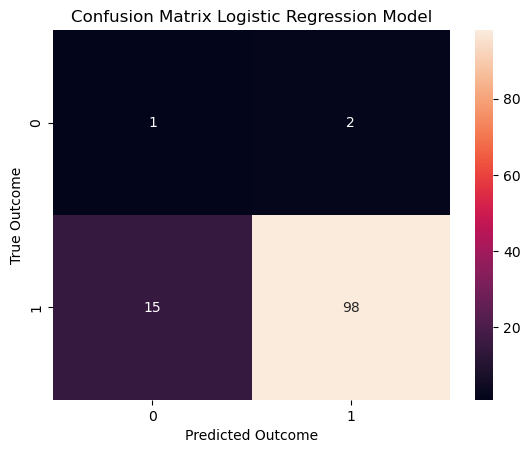

In [117]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), fmt='d', annot=True)
plt.ylabel('True Outcome')
plt.xlabel('Predicted Outcome')
plt.title('Confusion Matrix Logistic Regression Model')

We see that the model performs excellently on class 1, which is the majority of the data:
- Precision = 0.98, which means that almost all samples that were predicted as class 1, were actuall class 1 (100 out of 102 samples)
- Recall = 0.87, which means that the model correctly identifies 88% of the actual class 1 samples 100 out of 113 samples)
- F1 score = 0.92, which combines the two previous scores, is excellent (1 is the best result for this score)

Although, the model fails to predict samples that belong to class 0:
- Precision = 0.06
- Recall = 0.33
- F1 score = 0.11

The poor performance can be attributed to the extremely low number of class 0 samples, which prevents the model from learning effectively and generalizing to unseen data.

Let's see how the other models perform.

### Decision Trees

In [118]:
# Features
X = df_spacex[['Year', 'Block', 'Reused', 'Launch Site', 'Payload (Kg)', 'Orbit', 'Landing Type']]

# Target Value
y = df_spacex['Landing Success']

In [119]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [120]:
# Preprocessor
num_cols = ['Year', 'Block', 'Reused', 'Payload (Kg)']
cat_cols = ['Launch Site', 'Orbit', 'Landing Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [121]:
from sklearn.tree import DecisionTreeClassifier

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(class_weight='balanced'))
])

In [122]:
# Parameter Grid for GridSearch
param_grid = {
    'dt__max_depth': [3, 5, 10, None],
    'dt__min_samples_split': [2, 5, 10]
}

In [123]:
# GridSearch
grid_search_dt = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

In [124]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Block',
                                                                          'Reused',
                                                                          'Payload '
                                                                          '(Kg)']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Launch '
                                                                          'Site',
                                                                          'Orbit',
                                                                          'Landing '
                                                                          'Type'])])),
                                       ('dt',
                                        DecisionTreeClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [3, 5, 10, None],
                         'dt__min_samples_split': [2, 5, 10]},
             scoring='f1')

In [125]:
# Score/Evaluation
best_model_dt = grid_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)

print('Best parameters: ', grid_search_dt.best_params_)
print('Best score (training data): ', grid_search_dt.best_score_)
print('F1 score: ', f1_score(y_test, y_pred_dt))
print('Classification Report:')
print(classification_report(y_test, y_pred_dt))

Best parameters:  {'dt__max_depth': 10, 'dt__min_samples_split': 5}
Best score (training data):  0.9429187131163145
F1 score:  0.9056603773584906
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.97      0.85      0.91       113

    accuracy                           0.83       116
   macro avg       0.48      0.42      0.45       116
weighted avg       0.94      0.83      0.88       116



Text(0.5, 1.0, 'Confusion Matrix Decision Tree')

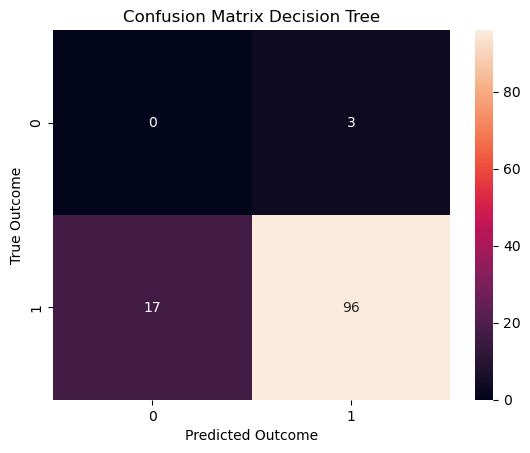

In [126]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), fmt='d', annot=True)
plt.ylabel('True Outcome')
plt.xlabel('Predicted Outcome')
plt.title('Confusion Matrix Decision Tree')

As the Logistic Regression model, Decision Tree perfoms very good for class 1, but it can not predict samples of class 0.

### Random Forest

In [127]:
# Features
X = df_spacex[['Year', 'Block', 'Reused', 'Launch Site', 'Payload (Kg)', 'Orbit', 'Landing Type']]

# Target Value
y = df_spacex['Landing Success']

In [128]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [129]:
# Preprocessor
num_cols = ['Year', 'Block', 'Reused', 'Payload (Kg)']
cat_cols = ['Launch Site', 'Orbit', 'Landing Type']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [130]:
from sklearn.ensemble import RandomForestClassifier

#Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

In [131]:
param_grid = {
    'rf__max_depth': [3, 5, 10, 15, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__criterion': ['gini', 'entropy']
}

In [132]:
from sklearn.model_selection import StratifiedKFold # We ensure that each fold will include samples from class 0

# GridSearch
grid_search_rf = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=3),
    scoring='f1',
    n_jobs=-1
)

In [133]:
# Fit
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Block',
                                                                          'Reused',
                                                                          'Payload '
                                                                          '(Kg)']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Launch '
                                                                          'Site',
                                                                          'Orbit',
                                                                          'Landing '
                                                                          'Type'])])),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [3, 5, 10, 15, None],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10]},
             scoring='f1')

In [134]:
# Score/Evaluation
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)

print('Best parameters: ', grid_search_rf.best_params_)
print('Best score (training data): ', grid_search_rf.best_score_)
print('F1 score: ', f1_score(y_test, y_pred_rf))
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))

Best parameters:  {'rf__criterion': 'gini', 'rf__max_depth': 3, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2}
Best score (training data):  0.9769171795264571
F1 score:  0.9688888888888889
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.97      0.96      0.97       113

    accuracy                           0.94       116
   macro avg       0.49      0.48      0.48       116
weighted avg       0.95      0.94      0.94       116



Text(0.5, 1.0, 'Confusion Matrix Random Forest')

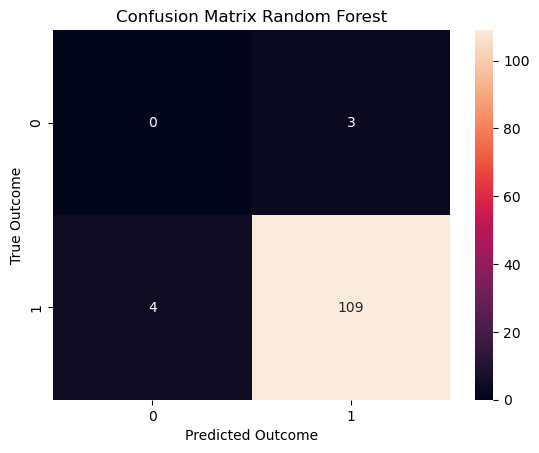

In [135]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), fmt='d', annot=True)
plt.ylabel('True Outcome')
plt.xlabel('Predicted Outcome')
plt.title('Confusion Matrix Random Forest')

In this model, we have even better results for class 1, but the few samples of class 0, don't allow the model to learn the class 0, so it fails to predict it.

### Support Vector Machine (SVM)

In [136]:
# Features
X = df_spacex[['Year', 'Block', 'Reused', 'Launch Site', 'Payload (Kg)', 'Orbit', 'Landing Type']]

# Target Value
y = df_spacex['Landing Success']

In [137]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [138]:
# Preprocessor
num_cols = ['Year', 'Block', 'Reused', 'Payload (Kg)']
cat_cols = ['Launch Site', 'Orbit', 'Landing Type']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [139]:
from sklearn.svm import SVC

#Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svm', SVC(class_weight='balanced', random_state=42))
])

In [140]:
# Parameters that GridSearch will try on SVM
param_grid = {
    'svm__C':    [0.1, 1, 10, 100],
    'svm__kernel':  ['linear', 'rbf', 'poly'],
    'svm__gamma':   ['scale', 'auto', 0.1, 1, 10],
    'svm__degree':  [2, 3, 4]
}

In [141]:
from sklearn.model_selection import StratifiedKFold

# GridSearch
grid_search_svm = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1,
    scoring='f1'
)

In [142]:
# Fit
grid_search_svm.fit(X_train, y_train)

C:\Users\George\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Block',
                                                                          'Reused',
                                                                          'Payload '
                                                                          '(Kg)']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Launch '
                                                                          'Site',
                                                                          'Orbit',
                                                                          'Landing '
                                                                          'Type'])])),
                                       ('svm',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100], 'svm__degree': [2, 3, 4],
                         'svm__gamma': ['scale', 'auto', 0.1, 1, 10],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='f1')

In [143]:
# Score/Evaluation
best_model_svm = grid_search_svm.best_estimator_
y_pred_svm = best_model_svm.predict(X_test)

print('Best parameters: ', grid_search_svm.best_params_)
print('Best score (training data): ', grid_search_svm.best_score_)
print('F1 score: ', f1_score(y_test, y_pred_svm))
print('Classification Report:')
print(classification_report(y_test, y_pred_svm))

Best parameters:  {'svm__C': 0.1, 'svm__degree': 3, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}
Best score (training data):  0.9886789094054127
F1 score:  0.9823008849557522
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.98      0.98      0.98       113

    accuracy                           0.97       116
   macro avg       0.66      0.66      0.66       116
weighted avg       0.97      0.97      0.97       116



Text(0.5, 23.52222222222222, 'Predicted Outcome')

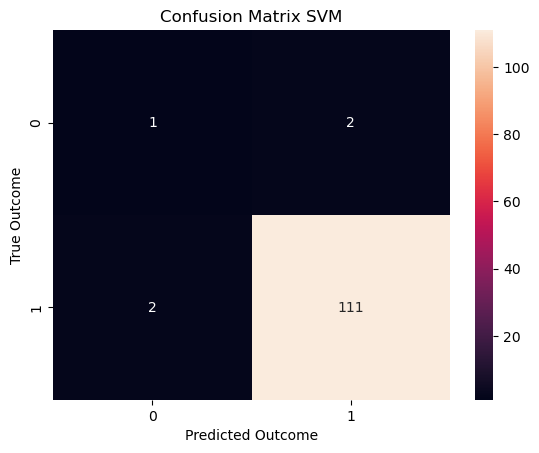

In [144]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), fmt='d', annot=True)
plt.title('Confusion Matrix SVM')
plt.ylabel('True Outcome')
plt.xlabel('Predicted Outcome')

Support Vector Machine model seems to have the best performance of the four models.

It predicted every class 1 sample (recall = 1 for class 1), but it performed poor for class 0 (recall = 0.33 for class 0)

It predicts 1/3 samples of class 0(precision = 0.33 for class 0) and its performance is almost excellent for class 1 (precision = 0.98 for class 1)

F1 score for class 1 is very high and it is improved for class 0, in relation to the other three models.

## 7. Conclusion

In this project, I tried to predict the landing outcome of the booster of SpaceX's rocket.

First, I collected the data of every launch of SpaceX with single booster. I used two different ways to collect the data. I used SpaceX's API and web scraping to collect data from Wikipedia.

Then, I preprocessed and cleaned the data to a handy form.

I understood the data and I extracted useful information from it.

Finally, I deployed four classification models that predict the landing outcome of the booster. The models performed almost excellent for the class 1, but not this good for class 0. This is due to small number of samples of class 0. So, there are two problems:

- The model doesn't have the ability to learn patterns or features of class 0. This ends up in a mistaken generalization.
- There is a bias for the majority class, i.e., class 1. We can see this by the metrics for class 0, that are really low. The model does not risk to fail and predict the minority class 0. That's why precision is almost zero for the first three models.

Finally, Support Vector Machine model perfoms better in relation to the other models. But it still performs poorly for class 0.

There are some solutions to improve the models:

- Oversampling of the minority class with SMOTE. With SMOTE we can create synthetic data to increase the data of class 0.
- Undersampling of the majority class with RandomUnderSampler.
- Adjustment of the Decision Threshold for class 0. For example, every model classifies its prediction by a threshold that by default is set up for p >= 0.5 (with p representing the probability of a sample to belong in class 0). If we decrease this threshold, samples that had 0.3 < p < 0.5 before, they will now be classified as class 0.
- Collection of more data, like weather conditions, wind speed, fuel remaining and rocket velocity, that may distinguish samples of class 0.
- For other topics, we could try to collect more samples of class 0. Unfortunately, I used all the data of SpaceX's launches, so there are not yet any other failed missions.

## Save/Load All

In [148]:
variables_dict = {
    'data': data,
    'data_dict': data_dict,
    'df': df,
    'df_spacex': df_spacex,
    'spacex_api_22': spacex_api_22,
    'spacex_wiki_23_25': spacex_wiki_23_25,
    'spacex22': spacex22,
    'spacex23_25': spacex23_25,
    't2023': t2023,
    'tables': tables,
    'tables23_24_25': tables23_24_25,
    'grid_search': grid_search,
    'grid_search_dt': grid_search_dt,
    'grid_search_rf': grid_search_rf,
    'grid_search_svm': grid_search_svm
}

joblib.dump(variables_dict, 'spacex_prj.joblib')

['spacex_prj.joblib']

In [149]:
# Required libraries
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score

loaded_objects = joblib.load('spacex_prj.joblib')

data = loaded_objects['data']
data_dict = loaded_objects['data_dict']
df = loaded_objects['df']
df_spacex = loaded_objects['df_spacex']
spacex_api_22 = loaded_objects['spacex_api_22']
spacex_wiki_23_25 = loaded_objects['spacex_wiki_23_25']
spacex22 = loaded_objects['spacex22']
spacex23_25 = loaded_objects['spacex23_25']
t2023 = loaded_objects['t2023']
tables = loaded_objects['tables']
tables23_24_25 = loaded_objects['tables23_24_25']
grid_search = loaded_objects['grid_search']
grid_search_dt = loaded_objects['grid_search_dt']
grid_search_rf = loaded_objects['grid_search_rf']
grid_search_svm = loaded_objects['grid_search_svm']